In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#for model selection and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score

#for feature scaling
from sklearn.preprocessing import StandardScaler

#for performing PCA
from sklearn.decomposition import PCA

# import libraries

In [2]:
zee = pd.read_csv("ZEEL.csv")


In [3]:
zee.columns


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [4]:
zee.shape

(5204, 15)

In [5]:
zee.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ZEETELE,EQ,1092.55,1175.00,1179.95,1160.00,1179.95,1179.95,1177.03,1261391,1.484690e+14,NaN,NaN,NaN
1,2000-01-04,ZEETELE,EQ,1179.95,1220.00,1274.35,1183.10,1274.35,1260.65,1228.02,4616547,5.669220e+14,NaN,NaN,NaN
2,2000-01-05,ZEETELE,EQ,1260.65,1160.55,1317.70,1159.80,1190.95,1176.55,1238.35,8763127,1.085178e+15,NaN,NaN,NaN
3,2000-01-06,ZEETELE,EQ,1176.55,1195.00,1200.00,1095.00,1106.00,1115.45,1135.04,5164020,5.861353e+14,NaN,NaN,NaN
4,2000-01-07,ZEETELE,EQ,1115.45,1097.10,1097.10,1026.25,1026.25,1026.25,1029.94,755129,7.777374e+13,NaN,NaN,NaN


In [6]:
zee.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     519
%Deliverble            519
dtype: int64

In [7]:
zee["Deliverable Volume"].fillna(value=0, inplace=True)
zee["%Deliverble"].fillna(value=0, inplace=True)

In [8]:
zee.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [9]:
zee.dropna(axis=0, inplace=True)

In [10]:
zee.drop(columns=["Date", "Symbol", "Series"], inplace=True)

In [11]:
zee.isna().sum()

Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

# Initial Model Training: Regression

In [12]:
x = zee[["Prev Close", "Open", "High", "Low", "Last", "Close", "VWAP", "Trades", "Volume", "Deliverable Volume", "%Deliverble"]]
y = zee["Turnover"]

In [13]:
x.isna().sum()

Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Trades                0
Volume                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [15]:
x_train.shape

(1647, 11)

In [16]:
x_test.shape

(707, 11)

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(x_train,y_train)

LinearRegression()

In [19]:
# print the intercept and coeff
print(lm.intercept_)
print(lm.coef_)

-63203413170571.06
[-3.83100003e+12  3.89195270e+12  1.00503794e+12 -2.91434089e+12
 -6.26143558e+12  7.71345948e+12  5.27400190e+11  1.39846896e+09
  9.54960555e+06  2.34312842e+07 -5.50895092e+13]


In [20]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Prev Close,-3.831000e+12
Open,3.891953e+12
High,1.005038e+12
Low,-2.914341e+12
Last,-6.261436e+12
Close,7.713459e+12
VWAP,5.274002e+11
Trades,1.398469e+09
Volume,9.549606e+06
Deliverable Volume,2.343128e+07


In [21]:
predictions=lm.predict(x_test)
zee_init_testing=pd.DataFrame(data=list(zip(y_test,predictions)),columns=['ACTUAL','PRED'])

<AxesSubplot:xlabel='Close', ylabel='Turnover'>

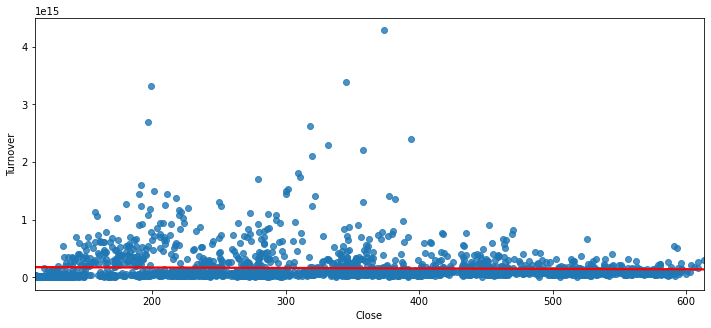

In [22]:
f, ax = plt.subplots(figsize=(12, 5))
sns.regplot(x="Close", y="Turnover", data=zee, ax=ax, line_kws={'color': 'red'})

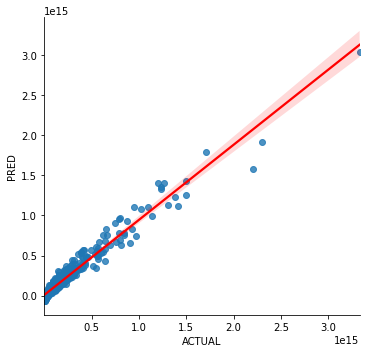

In [23]:
sns.lmplot(x='ACTUAL',y='PRED',data=zee_init_testing, line_kws={'color': 'red'})

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 35328726919448.05
MSE: 3.415091058081283e+27
RMSE: 58438780429448.414


In [25]:
r2_score(y_test,predictions)

0.955928776534534

In [27]:
lm.score(x_train,y_train)

0.9486418045811046

In [28]:
lm.score(x_test,y_test)

0.955928776534534

# Applying Feature Scaling

In [29]:
scaler = StandardScaler()
scaler.fit(zee)


StandardScaler()

In [30]:
scaled_data = scaler.transform(zee)


In [31]:
pca = PCA(n_components=2)


In [32]:
pca.fit(scaled_data)


PCA(n_components=2)

In [33]:
x_pca = pca.transform(scaled_data)


In [34]:
scaled_data.shape

(2354, 12)

In [35]:
x_pca.shape

(2354, 2)

Text(0, 0.5, 'Second Principal Component')

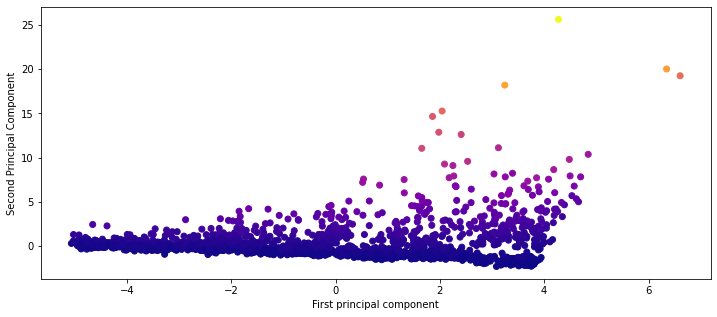

In [36]:
plt.figure(figsize=(12,5))
plt.scatter(x_pca[:,0],x_pca[:,1],c=zee['Turnover'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


In [37]:
pca.components_


array([[-0.3710882 , -0.37100361, -0.37037936, -0.37179171, -0.37105905,
        -0.37104278, -0.37119059,  0.12451053,  0.06384994,  0.06285829,
         0.10110673, -0.04844037],
       [ 0.06758319,  0.06876058,  0.07598608,  0.06066319,  0.06852031,
         0.06891503,  0.06832101,  0.47145681,  0.49846277,  0.48968285,
         0.42541747, -0.27501371]])

In [38]:
df_comp = pd.DataFrame(pca.components_,columns=['Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'])


<AxesSubplot:>

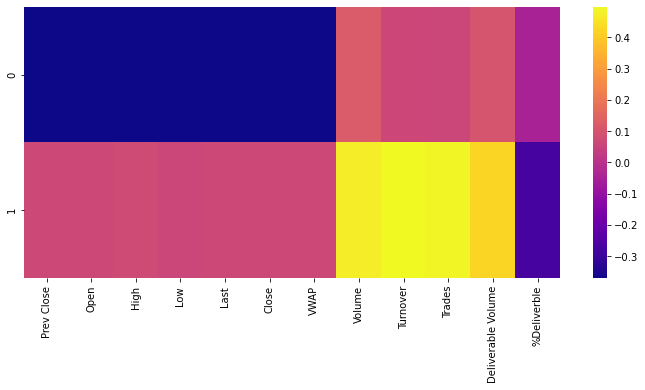

In [39]:
plt.figure(figsize=(12,5))
sns.heatmap(df_comp,cmap='plasma',)


In [40]:
import sklearn.model_selection as cv
x_train, x_test, y_train, y_test = cv.train_test_split(x, y,test_size=0.3,random_state=101)


In [41]:
sc = StandardScaler() #standardizing the data
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)


In [42]:
pca = PCA()
x_train_pca = pca.fit_transform(x_train_std)
print(pca.explained_variance_ratio_)


[6.46558309e-01 2.55236048e-01 7.79533439e-02 1.36482378e-02
 6.18185205e-03 3.03238943e-04 6.71605593e-05 2.61971504e-05
 1.66895114e-05 5.88278783e-06 3.04058381e-06]


In [43]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_std)


In [44]:
x_train_pca


array([[-0.69595483, -0.36011954],
       [ 1.03848554, -0.9348339 ],
       [ 1.74102547, -0.64916344],
       ...,
       [-2.36526402, -0.01730837],
       [-3.51598195, -0.18883848],
       [-0.96280303, -0.4787262 ]])

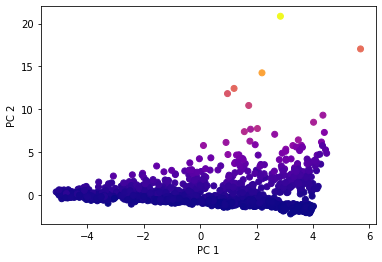

In [45]:
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train,cmap='plasma')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [59]:
pca = PCA(n_components=1)
pca.fit(scaled_data)
x_pca_1 = pca.transform(scaled_data)



In [47]:
diabetes_X, diabetes_y = x_train_pca[:, 0], x_train_pca[:, 1]

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=101)


In [48]:
x_train.shape

(1647, 2)

In [49]:
x_test.shape

(707, 2)

In [50]:
y_train.shape

(1647,)

In [51]:
lm = LinearRegression()

In [52]:
lm.fit(x_train,y_train)

LinearRegression()

In [53]:
# print the intercept and coeff
print(lm.intercept_)
print(lm.coef_)

161127858990318.0
[1.73394734e+13 1.37010705e+14]


In [54]:
predictions=lm.predict(x_test)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 31701862542613.285
MSE: 2.538998183499965e+27
RMSE: 50388472724423.44


In [56]:
r2_score(y_test,predictions)

0.9672346199792674

In [57]:
lm.score(x_train, y_train)

0.961288826638949

lm.score(x_test, y_test)

In [58]:
lm.score(x_test, y_test)


0.9672346199792674

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_pca_1, y, test_size=0.3, random_state=101)
lm.fit(x_train,y_train)
# print the intercept and coeff
print(lm.intercept_)
print(lm.coef_)

163807207946880.03
[1.83647288e+13]


In [61]:
predictions=lm.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 151345274818298.84
MSE: 7.563930612364717e+28
RMSE: 275026009903876.5


In [62]:
lm.score(x_train, y_train)

0.03107100833014098

In [63]:
lm.score(x_test, y_test)


0.023886418764795803